<a href="https://colab.research.google.com/github/SNMHZ/finedust_predict/blob/master/%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80_1227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 / 데이터 로드

In [1]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#2003년도부터 2017년도까지 미세먼지 데이터 로딩
DUST_DF_DICT={}
for i in range(15):
  DUST_DF_DICT['DUST_%d'%(i+2003)]=pd.read_csv('https://github.com/SNMHZ/finedust_predict/raw/master/dataset/%d.csv'%(i+2003), encoding='EUC_KR')

# 우리가 얻은 미세먼지 데이터 상태

In [3]:
DUST_DF_DICT['DUST_2017'].columns

Index(['측정소명', '년', '월', '일', '시', 'SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO'], dtype='object')

In [4]:
DUST_DF_DICT['DUST_2017']

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [ ]:
m_dict={}
for name in DUST_DF_DICT['DUST_2017']['측정소명']:
  m_dict[name]=0

In [ ]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [ ]:
len(m_dict.keys())

13

# 대기인자와 미세먼지 상관관계 확인하기. 피어슨 상관계수 도출.

## 함수 만들기(전처리 작업한 것. 중요X)

In [ ]:
m_dict.keys()

dict_keys(['수창동', '지산동', '서호동', '이현동', '대명동', '노원동', '신암동', '태전동', '만촌동', '호림동', '현풍면', '시지동', '진천동'])

In [6]:
dust2017=DUST_DF_DICT['DUST_2017'].copy()

In [7]:
suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']=='수창동').dropna().index]

In [8]:
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3
...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4


In [9]:
suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0
96453,수창동,2017,12,31,23,0.004,54,18,0.018,0.015,0.4,47.0


In [10]:
suchangdong=suchangdong[:-1]
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96401,수창동,2017,12,31,19,0.003,76,17,0.020,0.018,0.4,74.0
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
suchangdong.columns[5:]

Index(['SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO', 'PM10_res'], dtype='object')

In [11]:
suchangdong_drop=suchangdong[suchangdong.columns[5:]]
suchangdong_drop

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
suchangdong_drop.corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.304133,0.273105,-0.344421,0.676843,0.669121,0.320853
PM10,0.304133,1.000000,0.791031,0.005717,0.286660,0.299287,0.340913
PM25,0.273105,0.791031,1.000000,-0.073717,0.281354,0.287920,0.291834
O3,-0.344421,0.005717,-0.073717,1.000000,-0.588629,-0.359648,-0.034588
NO2,0.676843,0.286660,0.281354,-0.588629,1.000000,0.716747,0.312683
CO,0.669121,0.299287,0.287920,-0.359648,0.716747,1.000000,0.319632
PM10_res,0.320853,0.340913,0.291834,-0.034588,0.312683,0.319632,1.000000


In [ ]:
def dong_checker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop.corr(method='pearson')

## 동 개별로 찍어서 상관계수 확인(한개씩. 동마다 좀 다르다.)

In [ ]:
dong_checker(DUST_DF_DICT['DUST_2017'], '태전동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.146872,0.155635,0.013242,0.431721,0.530121,0.156603
PM10,0.146872,1.000000,0.476055,0.027750,0.125615,0.154781,0.338011
PM25,0.155635,0.476055,1.000000,-0.018025,0.184733,0.236334,0.149626
O3,0.013242,0.027750,-0.018025,1.000000,-0.554123,-0.403631,0.020452
NO2,0.431721,0.125615,0.184733,-0.554123,1.000000,0.769499,0.145260
CO,0.530121,0.154781,0.236334,-0.403631,0.769499,1.000000,0.176030
PM10_res,0.156603,0.338011,0.149626,0.020452,0.145260,0.176030,1.000000


In [ ]:
dong_checker(DUST_DF_DICT['DUST_2017'], '노원동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.472934,0.228456,-0.072785,0.401739,0.607318,0.495592
PM10,0.472934,1.000000,0.351670,-0.012805,0.447778,0.588282,0.885056
PM25,0.228456,0.351670,1.000000,-0.040524,0.210865,0.280907,0.330606
O3,-0.072785,-0.012805,-0.040524,1.000000,-0.564915,-0.285928,-0.053868
NO2,0.401739,0.447778,0.210865,-0.564915,1.000000,0.680052,0.499470
CO,0.607318,0.588282,0.280907,-0.285928,0.680052,1.000000,0.637043
PM10_res,0.495592,0.885056,0.330606,-0.053868,0.499470,0.637043,1.000000


In [ ]:
dong_checker(DUST_DF_DICT['DUST_2017'], '대명동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.132951,0.229272,-0.196500,0.525908,0.774948,0.141657
PM10,0.132951,1.000000,0.363267,0.008376,0.134527,0.146021,0.655739
PM25,0.229272,0.363267,1.000000,-0.092647,0.294275,0.263129,0.188327
O3,-0.196500,0.008376,-0.092647,1.000000,-0.520902,-0.312657,-0.000471
NO2,0.525908,0.134527,0.294275,-0.520902,1.000000,0.668085,0.152873
CO,0.774948,0.146021,0.263129,-0.312657,0.668085,1.000000,0.161354
PM10_res,0.141657,0.655739,0.188327,-0.000471,0.152873,0.161354,1.000000


In [ ]:
dong_checker(DUST_DF_DICT['DUST_2017'], '만촌동')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.199181,0.104894,-0.100235,0.491575,0.451863,0.209631
PM10,0.199181,1.000000,0.423425,0.062727,0.305268,0.313873,0.370190
PM25,0.104894,0.423425,1.000000,-0.021400,0.144702,0.172162,0.133291
O3,-0.100235,0.062727,-0.021400,1.000000,-0.505179,-0.339215,0.030702
NO2,0.491575,0.305268,0.144702,-0.505179,1.000000,0.751695,0.331745
CO,0.451863,0.313873,0.172162,-0.339215,0.751695,1.000000,0.336684
PM10_res,0.209631,0.370190,0.133291,0.030702,0.331745,0.336684,1.000000


## ☆★모든 동에 대해 상관계수 확인(전체) -> 동마다 다 상관계수가 다르게 나온다.. ★☆

In [ ]:
pearson_dict={}
for name in m_dict.keys():
  pearson_dict[name]=dong_checker(DUST_DF_DICT['DUST_2017'], name)

In [ ]:
for name in m_dict.keys():
  print(name)
  print(pearson_dict[name]['PM10_res'])
  print()
  print()

수창동
SO2         0.320853
PM10        0.340913
PM25        0.291834
O3         -0.034588
NO2         0.312683
CO          0.319632
PM10_res    1.000000
Name: PM10_res, dtype: float64


지산동
SO2         0.087492
PM10        0.432328
PM25        0.181844
O3          0.081411
NO2         0.336261
CO          0.087051
PM10_res    1.000000
Name: PM10_res, dtype: float64


서호동
SO2         0.155632
PM10        0.458647
PM25        0.080280
O3         -0.032607
NO2         0.178931
CO          0.167269
PM10_res    1.000000
Name: PM10_res, dtype: float64


이현동
SO2         0.357734
PM10        0.535670
PM25        0.369984
O3         -0.088979
NO2         0.381762
CO          0.344235
PM10_res    1.000000
Name: PM10_res, dtype: float64


대명동
SO2         0.141657
PM10        0.655739
PM25        0.188327
O3         -0.000471
NO2         0.152873
CO          0.161354
PM10_res    1.000000
Name: PM10_res, dtype: float64


노원동
SO2         0.495592
PM10        0.885056
PM25        0.330606
O3         -0

## 동별로 매칭한 데이터 이어 붙여서 상관관계 파악

### concat test(전처리 작업. 중요X)

In [12]:
def dong_df_maker(dust, dong_name):
  dust2017=dust.copy()
  suchangdong=dust2017.loc[dust2017['측정소명'].where(dust2017['측정소명']==dong_name).dropna().index]
  suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)
  suchangdong=suchangdong[:-1]
  suchangdong_drop=suchangdong[suchangdong.columns[5:]]
  return suchangdong_drop

In [ ]:
testd1=dong_df_maker(DUST_DF_DICT['DUST_2017'], '수창동')
testd2=dong_df_maker(DUST_DF_DICT['DUST_2017'], '태전동')

In [ ]:
testd1

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
testd2

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
7,0.004,65,37,0.001,0.038,1.0,59.0
18,0.004,59,38,0.001,0.036,1.0,78.0
29,0.004,78,48,0.001,0.032,0.9,62.0
40,0.003,62,40,0.001,0.028,0.9,60.0
51,0.004,60,38,0.001,0.028,0.9,56.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


In [ ]:
pd.concat([testd1, testd2])

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96408,0.004,83,19,0.031,0.013,0.5,76.0
96421,0.004,76,19,0.026,0.017,0.6,66.0
96434,0.005,66,19,0.025,0.018,0.6,68.0
96447,0.005,68,16,0.018,0.027,0.6,68.0


### ☆★매칭된 데이터셋 생성 및 전부 합쳐서 상관계수 확인★☆

In [ ]:
dong_dfs=[]
for name in m_dict.keys():
  dong_dfs.append( dong_df_maker(DUST_DF_DICT['DUST_2017'], name) )

In [ ]:
pd.concat(dong_dfs)

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96413,0.001,0,0,0.028,0.019,0.0,0.0
96426,0.001,0,0,0.030,0.016,0.0,0.0
96439,0.002,0,0,0.034,0.012,0.0,0.0
96452,0.002,0,0,0.033,0.012,0.0,0.0


In [ ]:
pd.concat(dong_dfs).corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
SO2,1.000000,0.172406,0.116828,-0.064815,0.355324,0.546804,0.177915
PM10,0.172406,1.000000,0.458797,0.019781,0.242918,0.157483,0.500013
PM25,0.116828,0.458797,1.000000,-0.034795,0.183405,0.135775,0.175638
O3,-0.064815,0.019781,-0.034795,1.000000,-0.514997,-0.167912,0.000235
NO2,0.355324,0.242918,0.183405,-0.514997,1.000000,0.399886,0.262418
CO,0.546804,0.157483,0.135775,-0.167912,0.399886,1.000000,0.194003
PM10_res,0.177915,0.500013,0.175638,0.000235,0.262418,0.194003,1.000000


# 단순 선형회귀

## 2017년

In [54]:
#max(suchangdong_drop[suchangdong_drop['PM10']<=500])
suchangdong_drop_outlier = suchangdong_drop[ (suchangdong_drop['PM10']<=500) & (suchangdong_drop['PM10_res']<=500)]
suchangdong_drop_outlier

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,65,45,0.001,0.038,0.9,63.0
11,0.005,63,43,0.002,0.035,0.9,64.0
22,0.006,64,50,0.001,0.034,1.0,68.0
33,0.005,68,53,0.001,0.032,0.9,82.0
44,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...
96401,0.003,76,17,0.020,0.018,0.4,74.0
96414,0.004,74,20,0.018,0.018,0.4,62.0
96427,0.003,62,19,0.016,0.021,0.5,59.0
96440,0.004,59,18,0.020,0.015,0.4,54.0


In [55]:
X = suchangdong_drop_outlier[['PM10']]#[suchangdong_drop.columns[:-1]]
X

,PM10
0,65
11,63
22,64
33,68
44,82
...,...
96401,76
96414,74
96427,62
96440,59


In [56]:
y = suchangdong_drop_outlier[['PM10_res']]
y

,PM10_res
0,63.0
11,64.0
22,68.0
33,82.0
44,72.0
...,...
96401,74.0
96414,62.0
96427,59.0
96440,54.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [59]:
#X_train.sort_values(by='PM10', ascending=False).head(20)

In [60]:
model = LinearRegression(normalize=True)

In [61]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
model.score(X_test, y_test)

0.8714182695940943

In [32]:
model.predict(X_test)

array([[41.05531337],
       [42.33688551],
       [38.17177604],
       ...,
       [42.97767159],
       [38.17177604],
       [38.49216907]])

In [33]:
import matplotlib.pyplot as plt

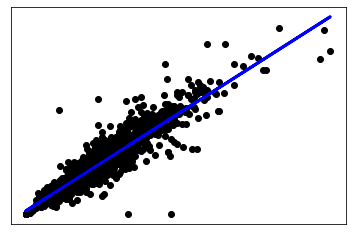

In [63]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
y_test

,PM10_res
74580,23.0
23914,34.0
51458,18.0
91300,20.0
51381,48.0
...,...
35541,41.0
74657,29.0
9647,33.0
78056,26.0


## 2016년

In [67]:
dust2016=DUST_DF_DICT['DUST_2016'].copy()
suchangdong2016=dust2016.loc[dust2016['측정소명'].where(dust2016['측정소명']=='수창동').dropna().index]
suchangdong2016['PM10_res']=suchangdong2016['PM10'].shift(-1)[:-1]
suchangdong2016_drop=suchangdong2016[suchangdong2016.columns[5:]]

In [79]:
suchangdong2016_drop

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,119,NaN,0.002,0.037,1.3,115.0
11,0.005,115,NaN,0.002,0.034,1.3,107.0
22,0.004,107,NaN,0.002,0.031,1.1,92.0
33,0.005,92,NaN,0.002,0.028,1.1,73.0
44,0.005,73,NaN,0.002,0.027,1.0,88.0
...,...,...,...,...,...,...,...
96569,0.005,35,20.0,0.011,0.033,0.6,44.0
96580,0.007,44,33.0,0.001,0.049,1.0,53.0
96591,0.006,53,31.0,0.002,0.047,1.0,61.0
96602,0.007,61,48.0,0.001,0.046,1.1,59.0


In [80]:
suchangdong2016_drop.describe()

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
count,8784.000000,8784.000000,1812.000000,8784.000000,8784.000000,8784.000000,8783.000000
mean,0.004775,44.273452,65.506623,0.024823,0.020275,0.457719,44.264944
std,0.002970,37.045957,176.293930,0.019799,0.013943,0.359494,37.039483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003000,25.000000,12.000000,0.007000,0.010000,0.300000,25.000000
50%,0.004000,37.000000,31.000000,0.023000,0.016000,0.400000,37.000000
75%,0.006000,56.000000,52.000000,0.036000,0.028000,0.500000,56.000000
max,0.055000,985.000000,985.000000,0.118000,0.099000,14.900000,985.000000


In [110]:
#max(suchangdong_drop[suchangdong_drop['PM10']<=500])
suchangdong2016_drop_outlier = suchangdong2016_drop[ (suchangdong2016_drop['PM10']!=0) & (suchangdong2016_drop['PM10']!=0) & (suchangdong2016_drop['PM10']<=100) & (suchangdong2016_drop['PM10_res']<=100)]
suchangdong2016_drop_outlier

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
33,0.005,92,NaN,0.002,0.028,1.1,73.0
44,0.005,73,NaN,0.002,0.027,1.0,88.0
55,0.004,88,NaN,0.002,0.027,1.0,94.0
66,0.003,94,NaN,0.002,0.027,1.1,88.0
77,0.003,88,NaN,0.002,0.028,1.2,86.0
...,...,...,...,...,...,...,...
96558,0.004,32,20.0,0.020,0.022,0.5,35.0
96569,0.005,35,20.0,0.011,0.033,0.6,44.0
96580,0.007,44,33.0,0.001,0.049,1.0,53.0
96591,0.006,53,31.0,0.002,0.047,1.0,61.0


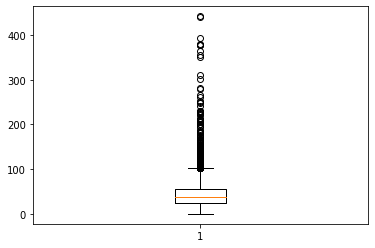

In [104]:
plt.boxplot(suchangdong2016_drop_outlier['PM10'])

plt.show()

In [103]:
suchangdong2016_drop_outlier.describe()#.sort_values(by='PM10_res', ascending=False)

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
count,8771.000000,8771.000000,1807.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,0.004776,43.704025,65.069175,0.024817,0.020275,0.457530,43.625698
std,0.002971,30.794155,175.197326,0.019810,0.013945,0.359435,30.423750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003000,25.000000,12.000000,0.007000,0.010000,0.300000,25.000000
50%,0.004000,37.000000,31.000000,0.023000,0.016000,0.400000,37.000000
75%,0.006000,56.000000,52.000000,0.036000,0.028000,0.500000,56.000000
max,0.055000,442.000000,985.000000,0.118000,0.099000,14.900000,442.000000


In [111]:
X = suchangdong2016_drop_outlier[['PM10']]#[suchangdong_drop.columns[:-1]]
X

,PM10
33,92
44,73
55,88
66,94
77,88
...,...
96558,32
96569,35
96580,44
96591,53


In [112]:
y = suchangdong2016_drop_outlier[['PM10_res']]
y

,PM10_res
33,73.0
44,88.0
55,94.0
66,88.0
77,86.0
...,...
96558,35.0
96569,44.0
96580,53.0
96591,61.0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model2016 = LinearRegression(normalize=True)
model2016.fit(X_train, y_train)
model2016.score(X_test, y_test)

0.8297977433997343

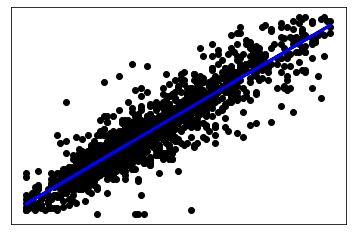

In [114]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [119]:
#max(suchangdong_drop[suchangdong_drop['PM10']<=500])
suchangdong2016_outlier = suchangdong2016_drop[ (suchangdong2016_drop['PM10']>=100) & (suchangdong2016_drop['PM10_res']>=100) & (suchangdong2016_drop['PM10']<=500) & (suchangdong2016_drop['PM10_res']<=500)]
suchangdong2016_outlier

,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,0.005,119,NaN,0.002,0.037,1.3,115.0
11,0.005,115,NaN,0.002,0.034,1.3,107.0
891,0.008,118,NaN,0.003,0.042,1.4,124.0
3960,0.010,110,NaN,0.002,0.042,1.2,109.0
3971,0.010,109,NaN,0.002,0.041,1.3,102.0
...,...,...,...,...,...,...,...
93907,0.010,153,108.0,0.002,0.067,1.7,152.0
93918,0.010,152,102.0,0.001,0.053,1.7,112.0
93929,0.011,112,78.0,0.001,0.056,2.0,117.0
95172,0.010,113,92.0,0.002,0.052,1.2,114.0


In [120]:
X = suchangdong2016_outlier[['PM10']]#[suchangdong_drop.columns[:-1]]
y = suchangdong2016_outlier[['PM10_res']]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model2016 = LinearRegression(normalize=True)
model2016.fit(X_train, y_train)
model2016.score(X_test, y_test)

0.8690307028841809

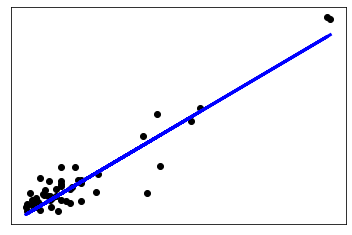

In [122]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 이전자료~~~

# 수창동에 날씨 정보 추가, 피어슨 상관계수, 날씨정보 분포도

In [ ]:
suchang = pd.read_excel("suchang.xlsx")
suchang = suchang.fillna(0)
suchang

,SO2,PM10,PM25,O3,NO2,CO,temp,rain,wind,humid,PM10_res
0,0.005,65,45,0.001,0.038,0.9,-0.1,0.0,0.6,90,63
1,0.005,63,43,0.002,0.035,0.9,-0.3,0.0,0.2,91,64
2,0.006,64,50,0.001,0.034,1.0,-0.9,0.0,0.0,93,68
3,0.005,68,53,0.001,0.032,0.9,-1.5,0.0,0.3,94,82
4,0.008,82,64,0.002,0.031,1.3,-1.6,0.0,0.2,95,72
...,...,...,...,...,...,...,...,...,...,...,...
8754,0.003,76,17,0.020,0.018,0.4,3.3,0.0,3.3,30,74
8755,0.004,74,20,0.018,0.018,0.4,2.1,0.0,2.4,29,62
8756,0.003,62,19,0.016,0.021,0.5,1.7,0.0,2.5,26,59
8757,0.004,59,18,0.020,0.015,0.4,1.3,0.0,2.4,28,54


In [ ]:
suchang.corr(method='pearson')

,SO2,PM10,PM25,O3,NO2,CO,temp,rain,wind,humid,PM10_res
SO2,1.000000,0.304133,0.273105,-0.344421,0.676843,0.669121,-0.452750,-0.058669,-0.229117,-0.146556,0.320853
PM10,0.304133,1.000000,0.791031,0.005717,0.286660,0.299287,-0.071240,-0.035322,-0.073085,-0.106242,0.340913
PM25,0.273105,0.791031,1.000000,-0.073717,0.281354,0.287920,-0.116657,-0.018699,-0.113852,-0.017215,0.291834
O3,-0.344421,0.005717,-0.073717,1.000000,-0.588629,-0.359648,0.598680,0.000955,0.365421,-0.370639,-0.034588
NO2,0.676843,0.286660,0.281354,-0.588629,1.000000,0.716747,-0.424854,-0.031343,-0.476202,0.089436,0.312683
CO,0.669121,0.299287,0.287920,-0.359648,0.716747,1.000000,-0.322873,-0.018416,-0.368751,0.160573,0.319632
temp,-0.452750,-0.071240,-0.116657,0.598680,-0.424854,-0.322873,1.000000,0.037762,-0.036559,0.145631,-0.082599
rain,-0.058669,-0.035322,-0.018699,0.000955,-0.031343,-0.018416,0.037762,1.000000,-0.017769,0.158546,-0.043654
wind,-0.229117,-0.073085,-0.113852,0.365421,-0.476202,-0.368751,-0.036559,-0.017769,1.000000,-0.470419,-0.106020
humid,-0.146556,-0.106242,-0.017215,-0.370639,0.089436,0.160573,0.145631,0.158546,-0.470419,1.000000,-0.086387


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


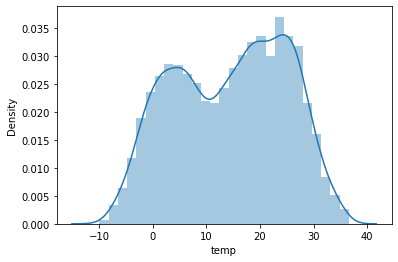

In [ ]:
sns.distplot(suchang['temp'])

# 여기부터 이전자료 (연습했던거. 중요X)


In [ ]:
del m_columns[0]

In [ ]:
df

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [ ]:
che=df['측정소명']

In [ ]:
che.where(che=='수창동').dropna().index

Int64Index([    0,    11,    22,    33,    44,    55,    66,    77,    88,
               99,
            ...
            96349, 96362, 96375, 96388, 96401, 96414, 96427, 96440, 96453,
            96466],
           dtype='int64', length=8760)

In [ ]:
suchangdong=df.loc[che.where(che=='수창동').dropna().index]

In [ ]:
suchangdong['PM10_res']=suchangdong['PM10'].shift(-1)

In [ ]:
suchangdong=suchangdong[:-1]

In [ ]:
suchangdong

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO,PM10_res
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9,63.0
11,수창동,2017,1,1,2,0.005,63,43,0.002,0.035,0.9,64.0
22,수창동,2017,1,1,3,0.006,64,50,0.001,0.034,1.0,68.0
33,수창동,2017,1,1,4,0.005,68,53,0.001,0.032,0.9,82.0
44,수창동,2017,1,1,5,0.008,82,64,0.002,0.031,1.3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96401,수창동,2017,12,31,19,0.003,76,17,0.020,0.018,0.4,74.0
96414,수창동,2017,12,31,20,0.004,74,20,0.018,0.018,0.4,62.0
96427,수창동,2017,12,31,21,0.003,62,19,0.016,0.021,0.5,59.0
96440,수창동,2017,12,31,22,0.004,59,18,0.020,0.015,0.4,54.0


In [ ]:
import tensorflow as tf

In [ ]:
suchangdong.columns[5:-1]

Index(['SO2', 'PM10', 'PM25', 'O3', 'NO2', 'CO'], dtype='object')

In [ ]:
X=suchangdong[suchangdong.columns[5:-1]]
Y=suchangdong['PM10_res']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=6, activation='relu', input_shape=(6,)),
  tf.keras.layers.Dense(units=1)
])

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=32, activation='relu', input_shape=(6,)),
  tf.keras.layers.Dense(units=16),
  tf.keras.layers.Dense(units=6),
  tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss='mse')

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, Y, epochs=10)

Epoch 1/10
274/274 [==============================] - 0s 948us/step - loss: nan
Epoch 2/10
274/274 [==============================] - 0s 879us/step - loss: nan
Epoch 3/10
274/274 [==============================] - 0s 905us/step - loss: nan
Epoch 4/10
274/274 [==============================] - 0s 916us/step - loss: nan
Epoch 5/10
274/274 [==============================] - 0s 860us/step - loss: nan
Epoch 6/10
274/274 [==============================] - 0s 976us/step - loss: nan
Epoch 7/10
274/274 [==============================] - 0s 870us/step - loss: nan
Epoch 8/10
274/274 [==============================] - 0s 869us/step - loss: nan
Epoch 9/10
274/274 [==============================] - 0s 834us/step - loss: nan
Epoch 10/10
274/274 [==============================] - 0s 853us/step - loss: nan


In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
206/206 [==============================] - 0s 813us/step - loss: 2205.7292
Epoch 2/10
206/206 [==============================] - 0s 857us/step - loss: 2205.9170
Epoch 3/10
206/206 [==============================] - 0s 847us/step - loss: 2213.2380
Epoch 4/10
206/206 [==============================] - 0s 934us/step - loss: 2208.3938
Epoch 5/10
206/206 [==============================] - 0s 883us/step - loss: 2207.4905
Epoch 6/10
206/206 [==============================] - 0s 898us/step - loss: 2206.3247
Epoch 7/10
206/206 [==============================] - 0s 911us/step - loss: 2209.4753
Epoch 8/10
206/206 [==============================] - 0s 852us/step - loss: 2206.7581
Epoch 9/10
206/206 [==============================] - 0s 851us/step - loss: 2207.5381
Epoch 10/10
206/206 [==============================] - 0s 824us/step - loss: 2207.7661


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pred_Y

array([[51.95857],
       [51.95857],
       [51.95857],
       ...,
       [51.95857],
       [51.95857],
       [51.95857]], dtype=float32)

In [ ]:
X_test

,SO2,PM10,PM25,O3,NO2,CO
54725,0.003,28,11,0.010,0.024,0.2
26510,0.000,18,9,0.000,0.000,0.0
5500,0.006,39,18,0.002,0.053,0.6
53746,0.001,50,25,0.060,0.012,0.3
32120,0.002,56,14,0.053,0.014,0.3
...,...,...,...,...,...,...
29788,0.003,36,16,0.055,0.012,0.3
85118,0.005,16,6,0.024,0.007,0.2
25751,0.004,47,22,0.073,0.016,0.4
3498,0.004,48,14,0.019,0.014,0.1


In [ ]:
Y_test

54725    34.0
26510    11.0
5500     51.0
53746    49.0
32120    46.0
         ... 
29788    37.0
85118    19.0
25751    48.0
3498     56.0
63987    53.0
Name: PM10_res, Length: 2190, dtype: float64

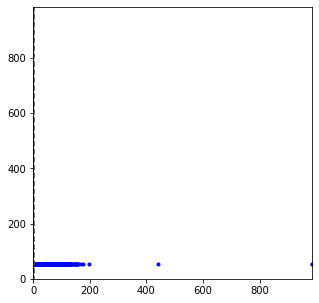

In [ ]:
pred_Y = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.plot(Y_test, pred_Y, 'b.')
plt.axis([min(Y_test), max(Y_test), min(Y_test), max(Y_test)])

plt.plot([min(Y_test), max(Y_test), min(Y_test), max(Y_test)], ls="--", c=".3")
plt.xlabel=('testY')
plt.ylabel=('predY')

plt.show()

==============================================

In [ ]:

for col in m_columns:
  print(col, df[col].mean())

SO2 0.003196301785880852
PM10 42.30261507685611
PM25 23.918168720654236
O3 0.028467573254288784
NO2 0.019847604141833446
CO 0.4328278692773342


In [ ]:
df['PM25'].mean()

23.918168720654236

In [ ]:
df

,측정소명,년,월,일,시,SO2,PM10,PM25,O3,NO2,CO
0,수창동,2017,1,1,1,0.005,65,45,0.001,0.038,0.9
1,지산동,2017,1,1,1,0.003,41,30,0.004,0.054,0.6
2,서호동,2017,1,1,1,0.007,52,31,0.002,0.044,1.1
3,이현동,2017,1,1,1,0.004,56,33,0.002,0.039,0.7
4,대명동,2017,1,1,1,0.004,57,38,0.001,0.038,0.7
...,...,...,...,...,...,...,...,...,...,...,...
96474,만촌동,2017,12,31,24,0.005,45,17,0.023,0.019,0.5
96475,호림동,2017,12,31,24,0.004,53,11,0.030,0.008,0.4
96476,현풍면,2017,12,31,24,0.002,47,9,0.032,0.008,0.3
96477,시지동,2017,12,31,24,0.001,1,1,0.026,0.015,0.1


In [ ]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd  

'\n# 코드를 쓰세요\nX_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)\n\nmodel=LinearRegression()\nmodel.fit(X_train, y_train)\ny_test_predict=model.predict(X_test)\n\n# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단\nmse = mean_squared_error(y_test, y_test_predict)\n\nmse ** 0.5'

In [ ]:
# 당뇨병 데이터 갖고 오기
diabetes_dataset = datasets.load_diabetes()

# 입력 변수를 사용하기 편하게 pandas dataframe으로 변환
X = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)

# 목표 변수를 사용하기 편하게 pandas dataframe으로 변환
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])
print(diabetes_dataset.feature_names)
print(diabetes_dataset.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.e

In [ ]:

# 코드를 쓰세요
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

model=LinearRegression()
model.fit(X_train, y_train)
y_test_predict=model.predict(X_test)

# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단
#mse = mean_squared_error(y_test, y_test_predict)

#mse ** 0.5

In [ ]:
mse = mean_squared_error(y_test, y_test_predict)

mse ** 0.5

54.60389611984442

In [ ]:
[ 1/30 for x in range(30) ]

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pykrx import stock
from matplotlib import gridspec

#KODEX 200 : 069500
#KODEX 골드선물(H) : 132030

start_date ='20110101'
end_date = '20201026'
freq = 20 #리밸런싱 주기
weights = [0.6, 0.4] # 투자 비중
equity = stock.get_market_ohlcv_by_date(start_date, end_date, '069500')['종가']
gold = stock.get_market_ohlcv_by_date(start_date, end_date, '132030')['종가']
equity_ret = equity.pct_change(1).iloc[1:]
gold_ret = gold.pct_change(1).iloc[1:]

N_days = len(gold_ret)
q = N_days // freq # 리밸런싱 횟수
r = N_days % freq # 리밸런싱 후 마지막 r일

daily_portfolio_value = [1]
rebalancing_multiplier = [1]
for i in range(q):
    hpr_equity =( equity_ret.iloc[i*freq : (i+1)*freq] + 1 ).cumprod()
    hpr_gold = ( gold_ret.iloc[i*freq : (i+1)*freq] + 1 ).cumprod()
    
    daily_temp = hpr_equity*weights[0]+hpr_gold*weights[1]
    daily_temp = daily_temp * rebalancing_multiplier[-1]
    
    daily_portfolio_value.extend(daily_temp)
    k = hpr_equity[-1] * weights[0] + hpr_gold[-1] * weights[1]
    k = k*rebalancing_multiplier[-1]
    rebalancing_multiplier.append(k)

hpr_equity = ( equity_ret.iloc[q*freq:] + 1).cumprod()
hpr_gold = ( gold_ret.iloc[q*freq:] + 1).cumprod()

daily_temp = hpr_equity*weights[0] + hpr_gold*weights[1]
daily_temp = daily_temp * rebalancing_multiplier[-1]

daily_portfolio_value.extend(daily_temp)

df = pd.DataFrame(index=equity.index, columns = ['equity','gold', '60:40'])
df['60:40'] = daily_portfolio_value
df['equity'] = (equity_ret+1).cumprod()
df['equity'].iloc[0] = 1

df['gold'] = (gold_ret+1).cumprod()
df['gold'].iloc[0] = 1

plt.figure(figsize=(10,7))
plt.plot(df, linewidth=0.5)
plt.legend(df.columns)

In [ ]:
d = {"key1": 10, "key2": 23}

if "key1" in d:
  print("this will execute")

if "nonexistent key" in d:
  print("this will not")
else:
  print("HEllo")

this will execute
HEllo
